In [1]:
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric
import fbprophet
import pandas as pd
from pandas import Series
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv("../data/num_crimes_time_series.csv")

data.head()

,offense_date,num_crimes
0,2011-01-01,242
1,2011-01-02,145
2,2011-01-03,133
3,2011-01-04,154
4,2011-01-05,142


In [2]:
data.dropna().describe()

,num_crimes
count,2882.000000
mean,139.657876
std,31.250889
min,62.000000
25%,119.000000
50%,136.000000
75%,157.000000
max,290.000000


In [3]:
def scale_data(data):
    year_population = { '2011': 228699, '2012': 229144, '2013': 228702,
                        '2014': 228435, '2015': 227864, '2016': 227352,
                        '2017': 225374, '2018': 225374}  
    date = pd.to_datetime(data['ds'])
    for year in year_population:
        if str(date.year) == year:
            return (data['y']*10000)/year_population[year]

data = data.rename(columns={'offense_date':'ds', 'num_crimes':'y'})

data['y'] = data.apply(scale_data, axis=1)
data[:10]

,ds,y
0,2011-01-01,10.581594
1,2011-01-02,6.340211
2,2011-01-03,5.815504
3,2011-01-04,6.733742
4,2011-01-05,6.209035
5,2011-01-06,6.821193
6,2011-01-07,8.570217
7,2011-01-08,8.701394
8,2011-01-09,5.728053
9,2011-01-10,5.553151


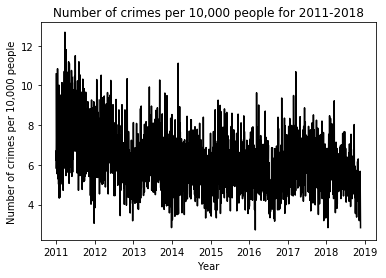

In [8]:
plt.plot_date(pd.to_datetime(data['ds']), data['y'], 'k-')
plt.xlabel('Year')
plt.ylabel('Number of crimes per 10,000 people')
plt.title('Number of crimes per 10,000 people for 2011-2018')
plt.savefig('per_ten.png')
plt.show()

In [9]:
data_prophet = fbprophet.Prophet(changepoint_prior_scale=0.10, 
                                 seasonality_mode='multiplicative')
data_prophet.fit(data)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [10]:
data_forecast = data_prophet.make_future_dataframe(periods=12*2, freq='M')

In [11]:
data_forecast = data_prophet.predict(data_forecast)
data_forecast[:10]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2011-01-01,8.050194,6.337806,9.043500,8.050194,8.050194,-0.038707,-0.038707,-0.038707,0.059132,0.059132,0.059132,-0.097839,-0.097839,-0.097839,0.0,0.0,0.0,7.738596
1,2011-01-02,8.047732,5.273957,8.041322,8.047732,8.047732,-0.165987,-0.165987,-0.165987,-0.069788,-0.069788,-0.069788,-0.096199,-0.096199,-0.096199,0.0,0.0,0.0,6.711910
2,2011-01-03,8.045269,5.196815,7.844303,8.045269,8.045269,-0.199354,-0.199354,-0.199354,-0.105418,-0.105418,-0.105418,-0.093936,-0.093936,-0.093936,0.0,0.0,0.0,6.441409
3,2011-01-04,8.042807,5.799807,8.413877,8.042807,8.042807,-0.118278,-0.118278,-0.118278,-0.027221,-0.027221,-0.027221,-0.091057,-0.091057,-0.091057,0.0,0.0,0.0,7.091523
4,2011-01-05,8.040345,5.799664,8.543954,8.040345,8.040345,-0.101439,-0.101439,-0.101439,-0.013859,-0.013859,-0.013859,-0.087580,-0.087580,-0.087580,0.0,0.0,0.0,7.224743
5,2011-01-06,8.037883,6.384754,9.104122,8.037883,8.037883,-0.028661,-0.028661,-0.028661,0.054877,0.054877,0.054877,-0.083537,-0.083537,-0.083537,0.0,0.0,0.0,7.807513
6,2011-01-07,8.035421,6.895432,9.624127,8.035421,8.035421,0.023303,0.023303,0.023303,0.102278,0.102278,0.102278,-0.078975,-0.078975,-0.078975,0.0,0.0,0.0,8.222669
7,2011-01-08,8.032959,6.556409,9.332649,8.032959,8.032959,-0.014818,-0.014818,-0.014818,0.059132,0.059132,0.059132,-0.073950,-0.073950,-0.073950,0.0,0.0,0.0,7.913924
8,2011-01-09,8.030496,5.581610,8.181601,8.030496,8.030496,-0.138321,-0.138321,-0.138321,-0.069788,-0.069788,-0.069788,-0.068532,-0.068532,-0.068532,0.0,0.0,0.0,6.919712
9,2011-01-10,8.028034,5.322539,8.019072,8.028034,8.028034,-0.168218,-0.168218,-0.168218,-0.105418,-0.105418,-0.105418,-0.062800,-0.062800,-0.062800,0.0,0.0,0.0,6.677576


Text(0.5,1,'Projected Number of Crimes for Next Two Years')

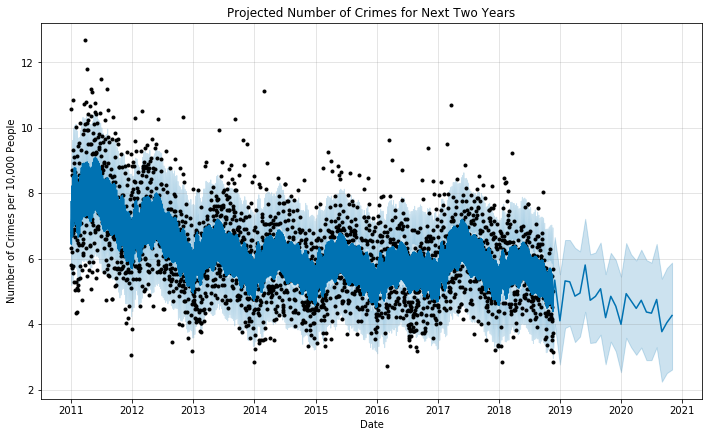

In [12]:
data_prophet.plot(data_forecast, xlabel='Date', ylabel='Number of Crimes per 10,000 People')
plt.title('Projected Number of Crimes for Next Two Years')

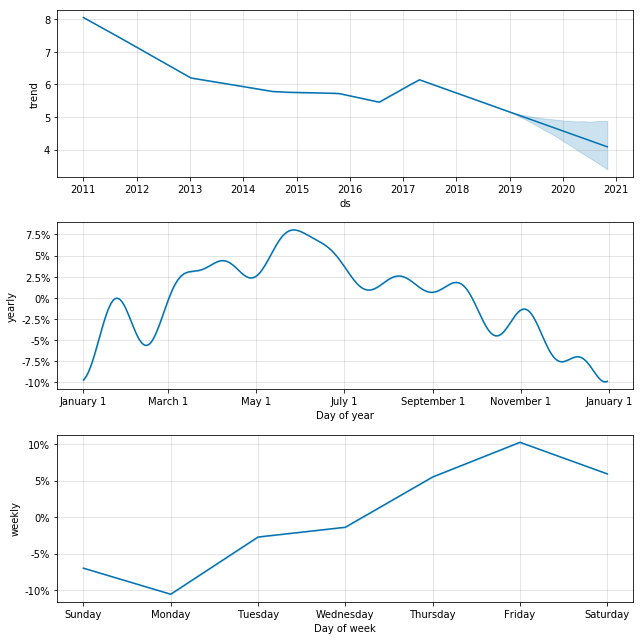

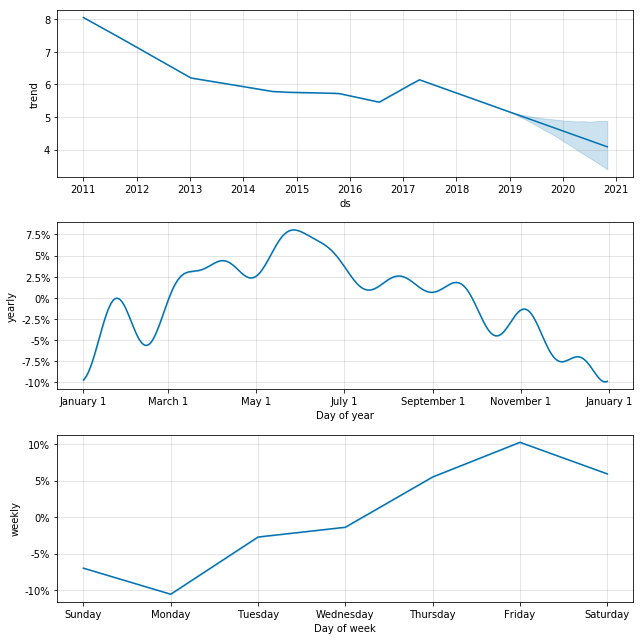

In [13]:
data_prophet.plot_components(data_forecast)

In [14]:
data_forecast = data_prophet.make_future_dataframe(periods=30*6, freq='D')
data_forecast = data_prophet.predict(data_forecast)

Text(0.5,1,'Projected Number of Crimes for Next Six Months')

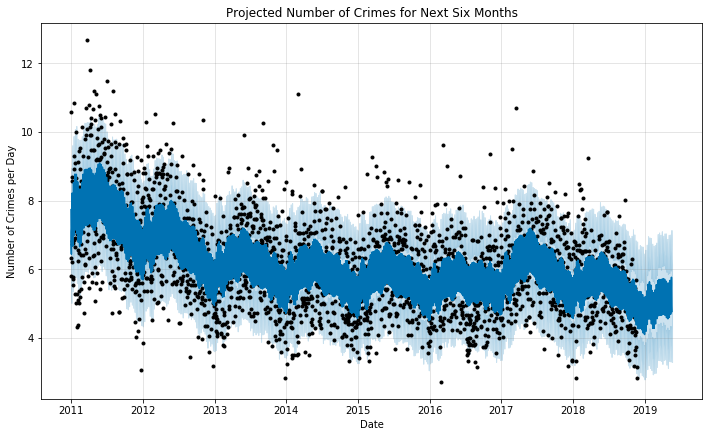

In [15]:
data_prophet.plot(data_forecast, xlabel='Date', ylabel='Number of Crimes per Day')
plt.title('Projected Number of Crimes for Next Six Months')

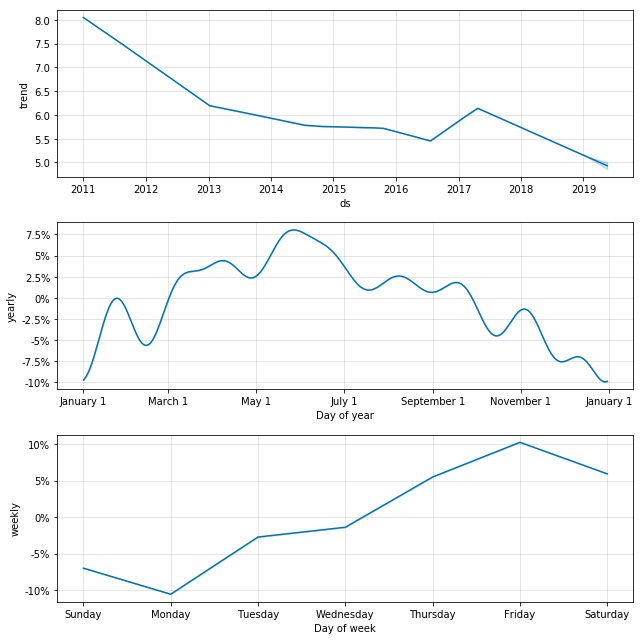

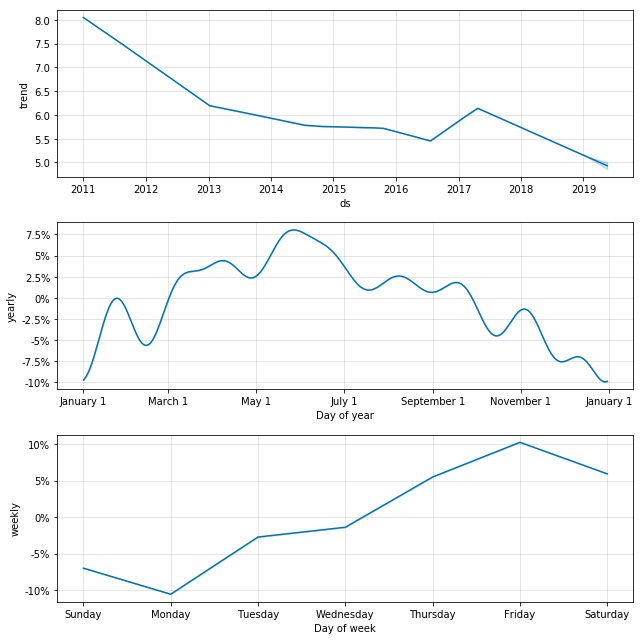

In [16]:
data_prophet.plot_components(data_forecast)

In [17]:
# cross validation
data_forecast_cv = cross_validation(data_prophet,initial='1460 days', 
                                    period='180 days',
                                    horizon='365 days')
data_forecast_cv.head()

INFO:fbprophet.diagnostics:Making 6 forecasts with cutoffs between 2015-06-05 00:00:00 and 2017-11-21 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-06-06,6.609403,5.064744,7.931672,4.651898,2015-06-05
1,2015-06-07,5.770667,4.368326,7.137015,6.012358,2015-06-05
2,2015-06-08,5.410195,4.032301,6.855276,5.046870,2015-06-05
3,2015-06-09,5.951912,4.521764,7.300591,4.169154,2015-06-05
4,2015-06-10,6.005141,4.645490,7.350027,7.109504,2015-06-05


In [18]:
data_forecast_perform = performance_metrics(data_forecast_cv)
data_forecast_perform.head()

,horizon,mse,rmse,mae,mape,coverage
766,37 days,1.223831,1.106269,0.890644,0.162229,0.794521
1496,37 days,1.208178,1.099172,0.884608,0.160724,0.799087
1861,37 days,1.220880,1.104935,0.890986,0.162199,0.794521
401,37 days,1.220517,1.104770,0.890789,0.162121,0.794521
1132,38 days,1.217828,1.103553,0.888338,0.161905,0.794521


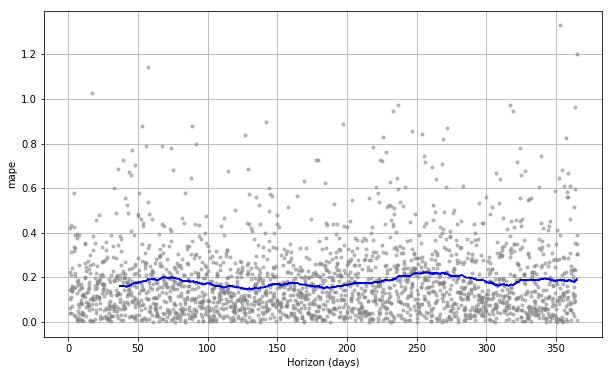

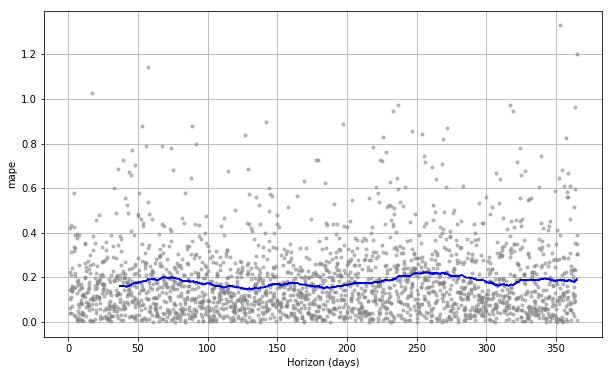

In [19]:
plot_cross_validation_metric(data_forecast_cv, metric='mape')